# Comparison of temperature models

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
#Gathering all model results 
Fuentes_results = pd.read_csv('Fuentes_results.csv')
SAPM_results = pd.read_csv('SAPM_results.csv')
Faiman_results = pd.read_csv('Faiman_results.csv')
Faiman_rad_results = pd.read_csv('Faiman_rad_results.csv')
Pvsyst_results = pd.read_csv('Pvsyst_results.csv')  #Cell temp
Ross_results = pd.read_csv('Ross_results.csv') #Cell temp

In [83]:
SAPM_results

,Module,RMSE,MBE
0,PT JKM325 nr 3,4.754052,4.478607
1,PT JKM335 nr 3,4.888080,4.638333
2,PT SunP nr 2,2.420734,2.062671
3,PT REC nr 3,3.264018,2.936109
4,PT Talesun FrLess 1,1.711401,1.711401
5,PT Talesun 3,2.601740,2.601740


## Comparison plot

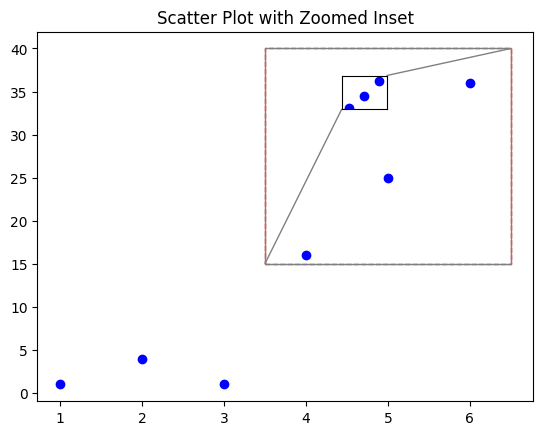

In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Sample data for demonstration
x = [1, 2, 3, 4, 5, 6]
y = [1, 4, 1, 16, 25, 36]

# Creating the main scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y, color='blue')
ax.set_title("Scatter Plot with Zoomed Inset")

# Create an inset axis (set the width and height as a fraction of the main plot)
inset = inset_axes(ax, width="30%", height="30%", 
                   bbox_to_anchor=(0.6, 0.6, 0.3, 0.3),  # Left, bottom, width, height
                   bbox_transform=ax.transAxes, loc="upper left")

# Plot the same data in the inset
inset.scatter(x, y, color='blue')

# Set limits for the inset plot to zoom in on the top right cluster
inset.set_xlim(3.5, 6.5)  # Adjust these values based on your data
inset.set_ylim(15, 40)    # Adjust these values based on your data

# Optionally remove tick labels from the inset
inset.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Add a rectangle on the main plot to show the zoomed area
rect = plt.Rectangle((3.5, 15), 3, 25, edgecolor="red", facecolor="none", linestyle="--")
ax.add_patch(rect)

# Optionally add lines connecting the inset and the rectangle
mark_inset(ax, inset, loc1=1, loc2=3, fc="none", ec="0.5")

plt.show()


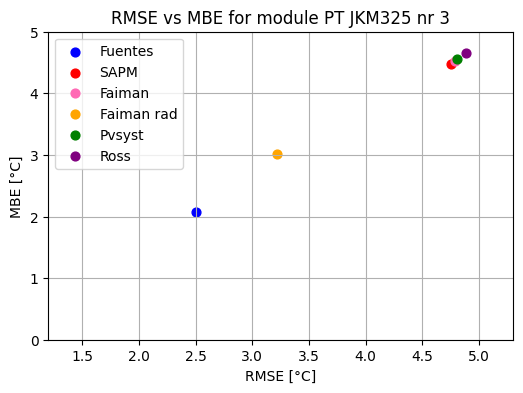

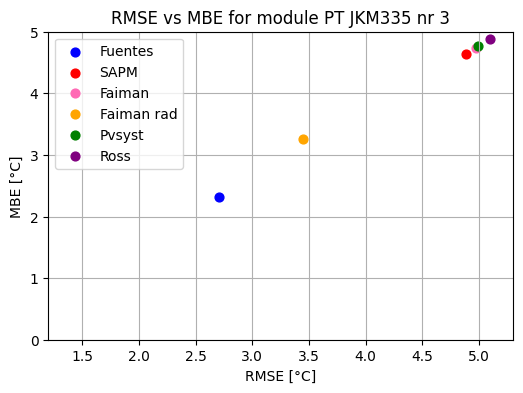

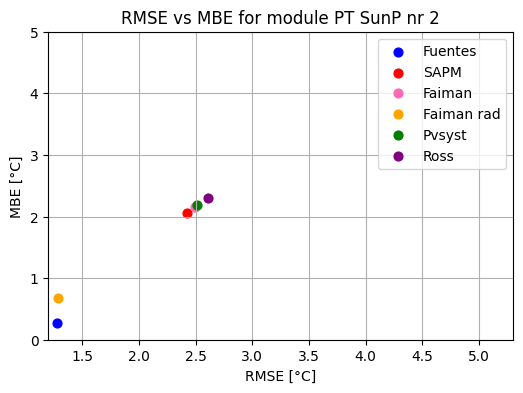

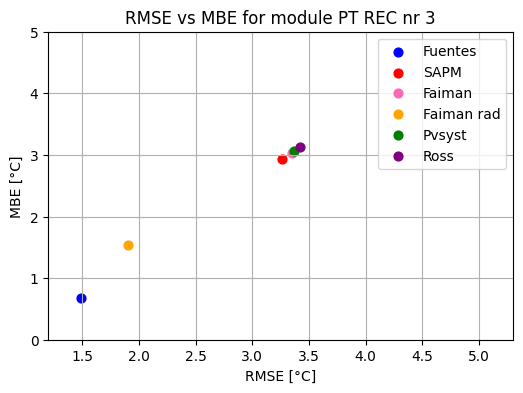

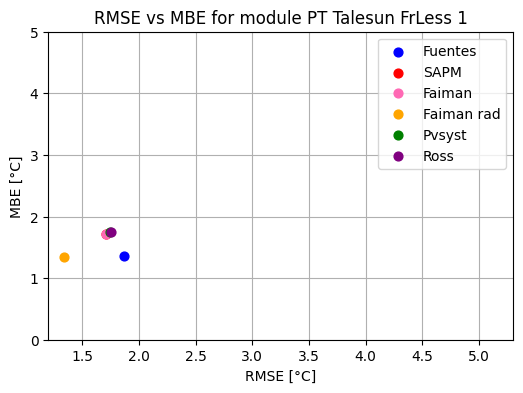

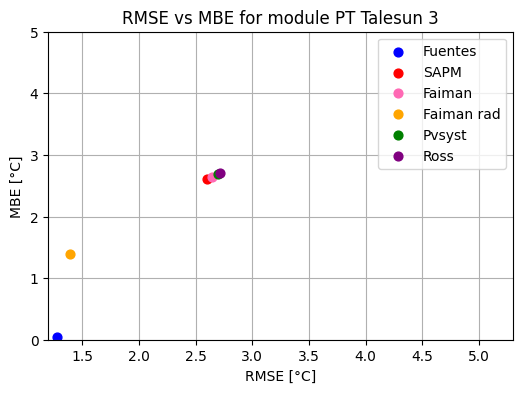

In [85]:
import matplotlib.cm as cm
import numpy as np

for j in range(6): 
    #RMSE-values for each model for the j-th module. 
    rmse_values = [
        Fuentes_results['RMSE'].iloc[j], 
        SAPM_results['RMSE'].iloc[j],
        Faiman_results['RMSE'].iloc[j],
        Faiman_rad_results['RMSE'].iloc[j],
        Pvsyst_results['RMSE'].iloc[j],
        Ross_results['RMSE'].iloc[j],
    ]
    #MBE-values for each model for the j-th module. 
    mbe_values = [
        Fuentes_results['MBE'].iloc[j], 
        SAPM_results['MBE'].iloc[j],
        Faiman_results['MBE'].iloc[j],
        Faiman_rad_results['MBE'].iloc[j],
        Pvsyst_results['MBE'].iloc[j],
        Ross_results['MBE'].iloc[j],
    ]

    models = ["Fuentes", "SAPM", "Faiman", "Faiman rad","Pvsyst", "Ross"]
    colors = ["b", "r", "hotpink", "orange", "green", "purple"]

    plt.figure(figsize=(6, 4))
    for i in range(len(rmse_values)):
        plt.scatter(rmse_values[i], np.abs(mbe_values[i]), color = colors[i], label=models[i], s=40)  #NÅ HAR JEG ABSOLUTTVERDI PÅ MBE, FINN UT HVA SOM ER BEST
    plt.xlabel('RMSE [°C]')
    plt.ylabel('MBE [°C]')
    plt.title(f'RMSE vs MBE for module {Fuentes_results["Module"].iloc[j]}')

    #Hvis jeg vil ha labels inne i plottet ved hvert punkt istedenfor
    """for i, (rmse, mbe) in enumerate(zip(rmse_values, mbe_values)):
        plt.text(rmse, mbe, models[i], fontsize=9)"""
    
    plt.xlim(1.2, 5.3)
    plt.ylim(0, 5)
    plt.legend()
    plt.grid(True)
    plt.show()